# Performance Benchmarking of FastAPI, Fastify, and Hono.js

This report presents a performance comparison of three web frameworks which are [FastAPI](https://fastapi.tiangolo.com/), [Fastify](https://fastify.dev/), and [Hono.js](https://hono.dev/) benchmarked using the Autocannon tool. The analysis focuses on the average requests per second handled by each framework, highlighting their strengths and suitability for different types of workloads.

The function `visualize_benchmark_results(request_path)` will help us to visualize the JSON results from [AutoCannon](https://github.com/mcollina/autocannon) for a given endpoint (don't read it, it's not worth it):

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.dpi"] = 300  # Increase DPI for better quality
plt.rcParams["savefig.dpi"] = 300  # Higher DPI for saved files

servers = ["fastapi", "fastify", "hono"]
colors = ["#00ccb8", "#202020", "#e36002"]


def visualize_benchmark_results(request_path: str):
    # Load data from multiple files
    data_sets = []
    for server in servers:
        with open(f"benchmarks/{server}.json", "r") as f:
            data_sets.append(json.load(f)[request_path])

    # Extract metrics
    metrics = ["min", "p25", "p50", "p75", "max"]
    width = 0.25  # Width of bars
    x = np.arange(len(metrics))

    plt.figure(figsize=(12, 7), facecolor="white")

    # Create bars for each dataset with offset
    for i, data in enumerate(data_sets):
        values = [data["requests"][m] for m in metrics]
        offset = width * (i - 1)
        bars = plt.bar(
            x + offset,
            values,
            width,
            label=data["title"],
            color=colors[i],
        )

    plt.ylabel("Requests per Second", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.xticks(x, metrics)
    plt.legend()

    # Add total requests for each test
    for i, data in enumerate(data_sets):
        plt.text(
            0.2 + (i * 0.25),
            -0.15,
            f'{data["title"]} Total: {data["requests"]["total"]:,}',
            ha="left",
            va="center",
            transform=plt.gca().transAxes,
        )

    plt.tight_layout()
    # plt.savefig("comparison_plot.png", bbox_inches="tight", dpi=300)
    plt.show()

## 1. Benchmark Results for `/` Endpoint

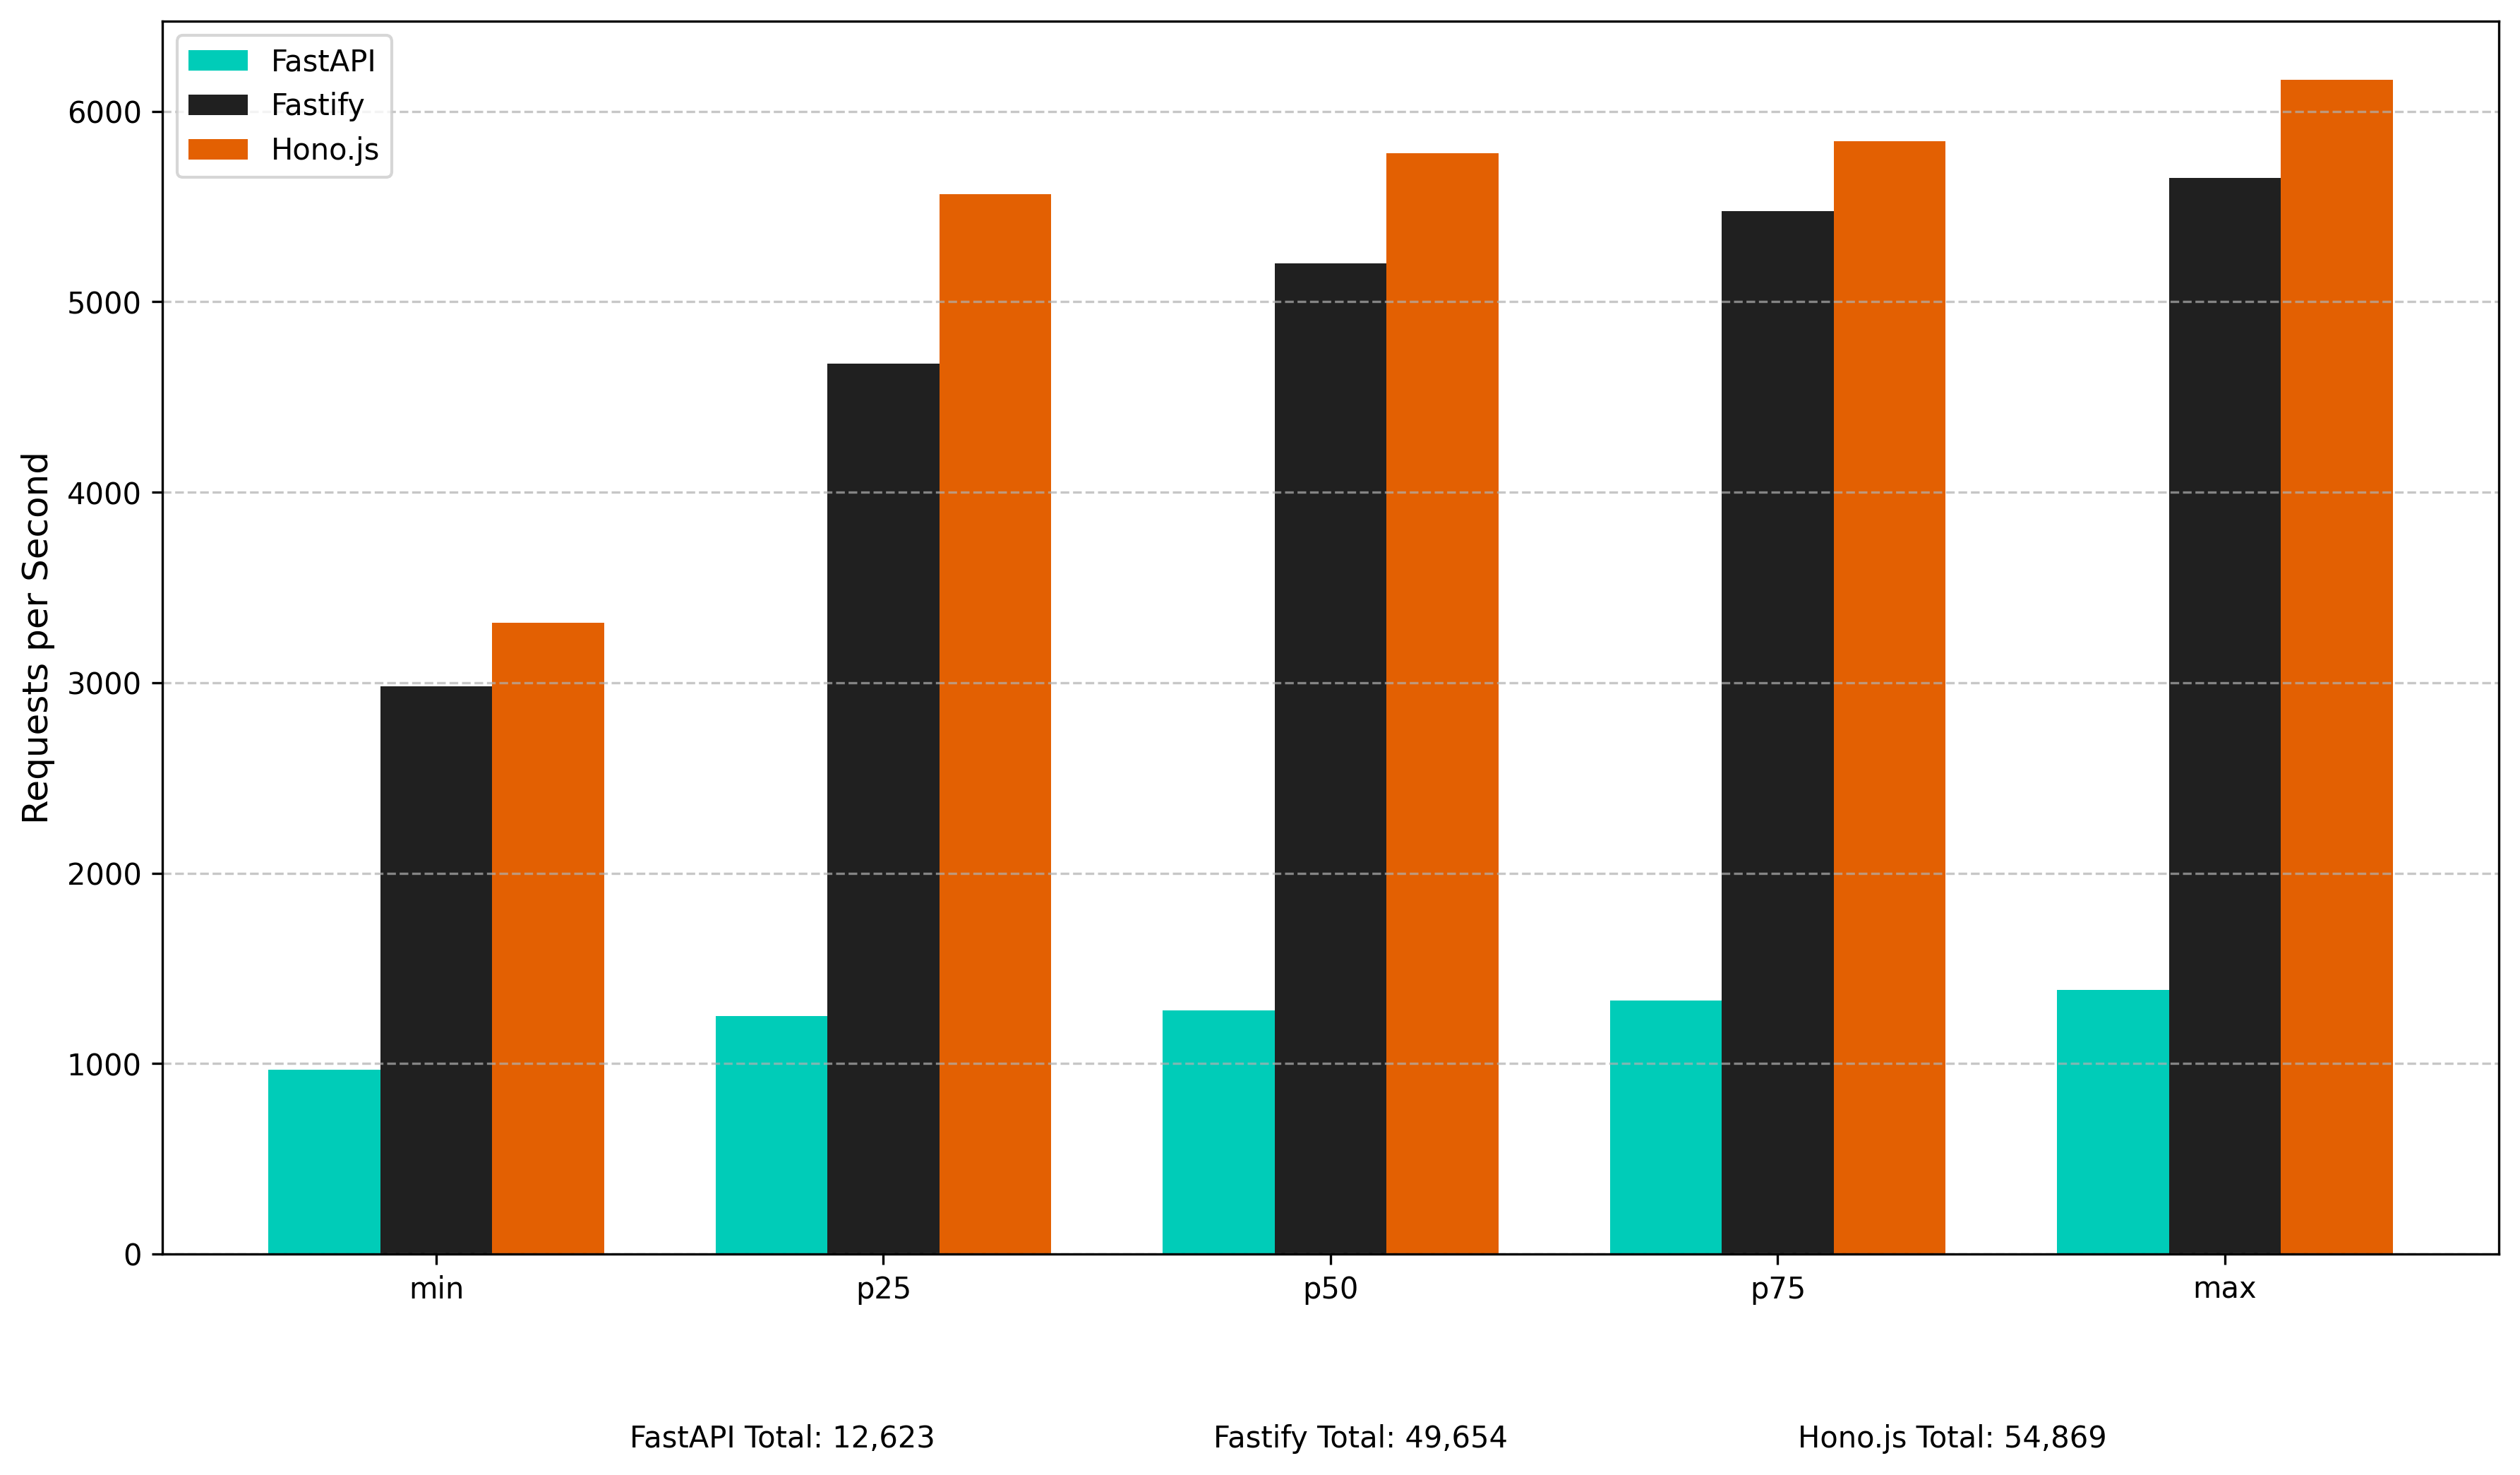

In [2]:
visualize_benchmark_results("/")

The `/` endpoint returns a simple and fixed JSON response, Hono.js and Fastify demonstrated significantly higher performance compared to FastAPI. **Hono.js was the fastest**, achieving an average of 5486.9 requests per second, making it approximately **4.3x faster** than FastAPI. Fastify followed closely with 4965.3 requests per second, which is about **3.9x** faster than FastAPI. While FastAPI delivered stable performance with minimal variability, its throughput was far lower than its counterparts, highlighting that both Hono.js and Fastify are much better choices for handling high volumes of lightweight requests efficiently.

## 2. Benchmark Results for `/items` Endpoint

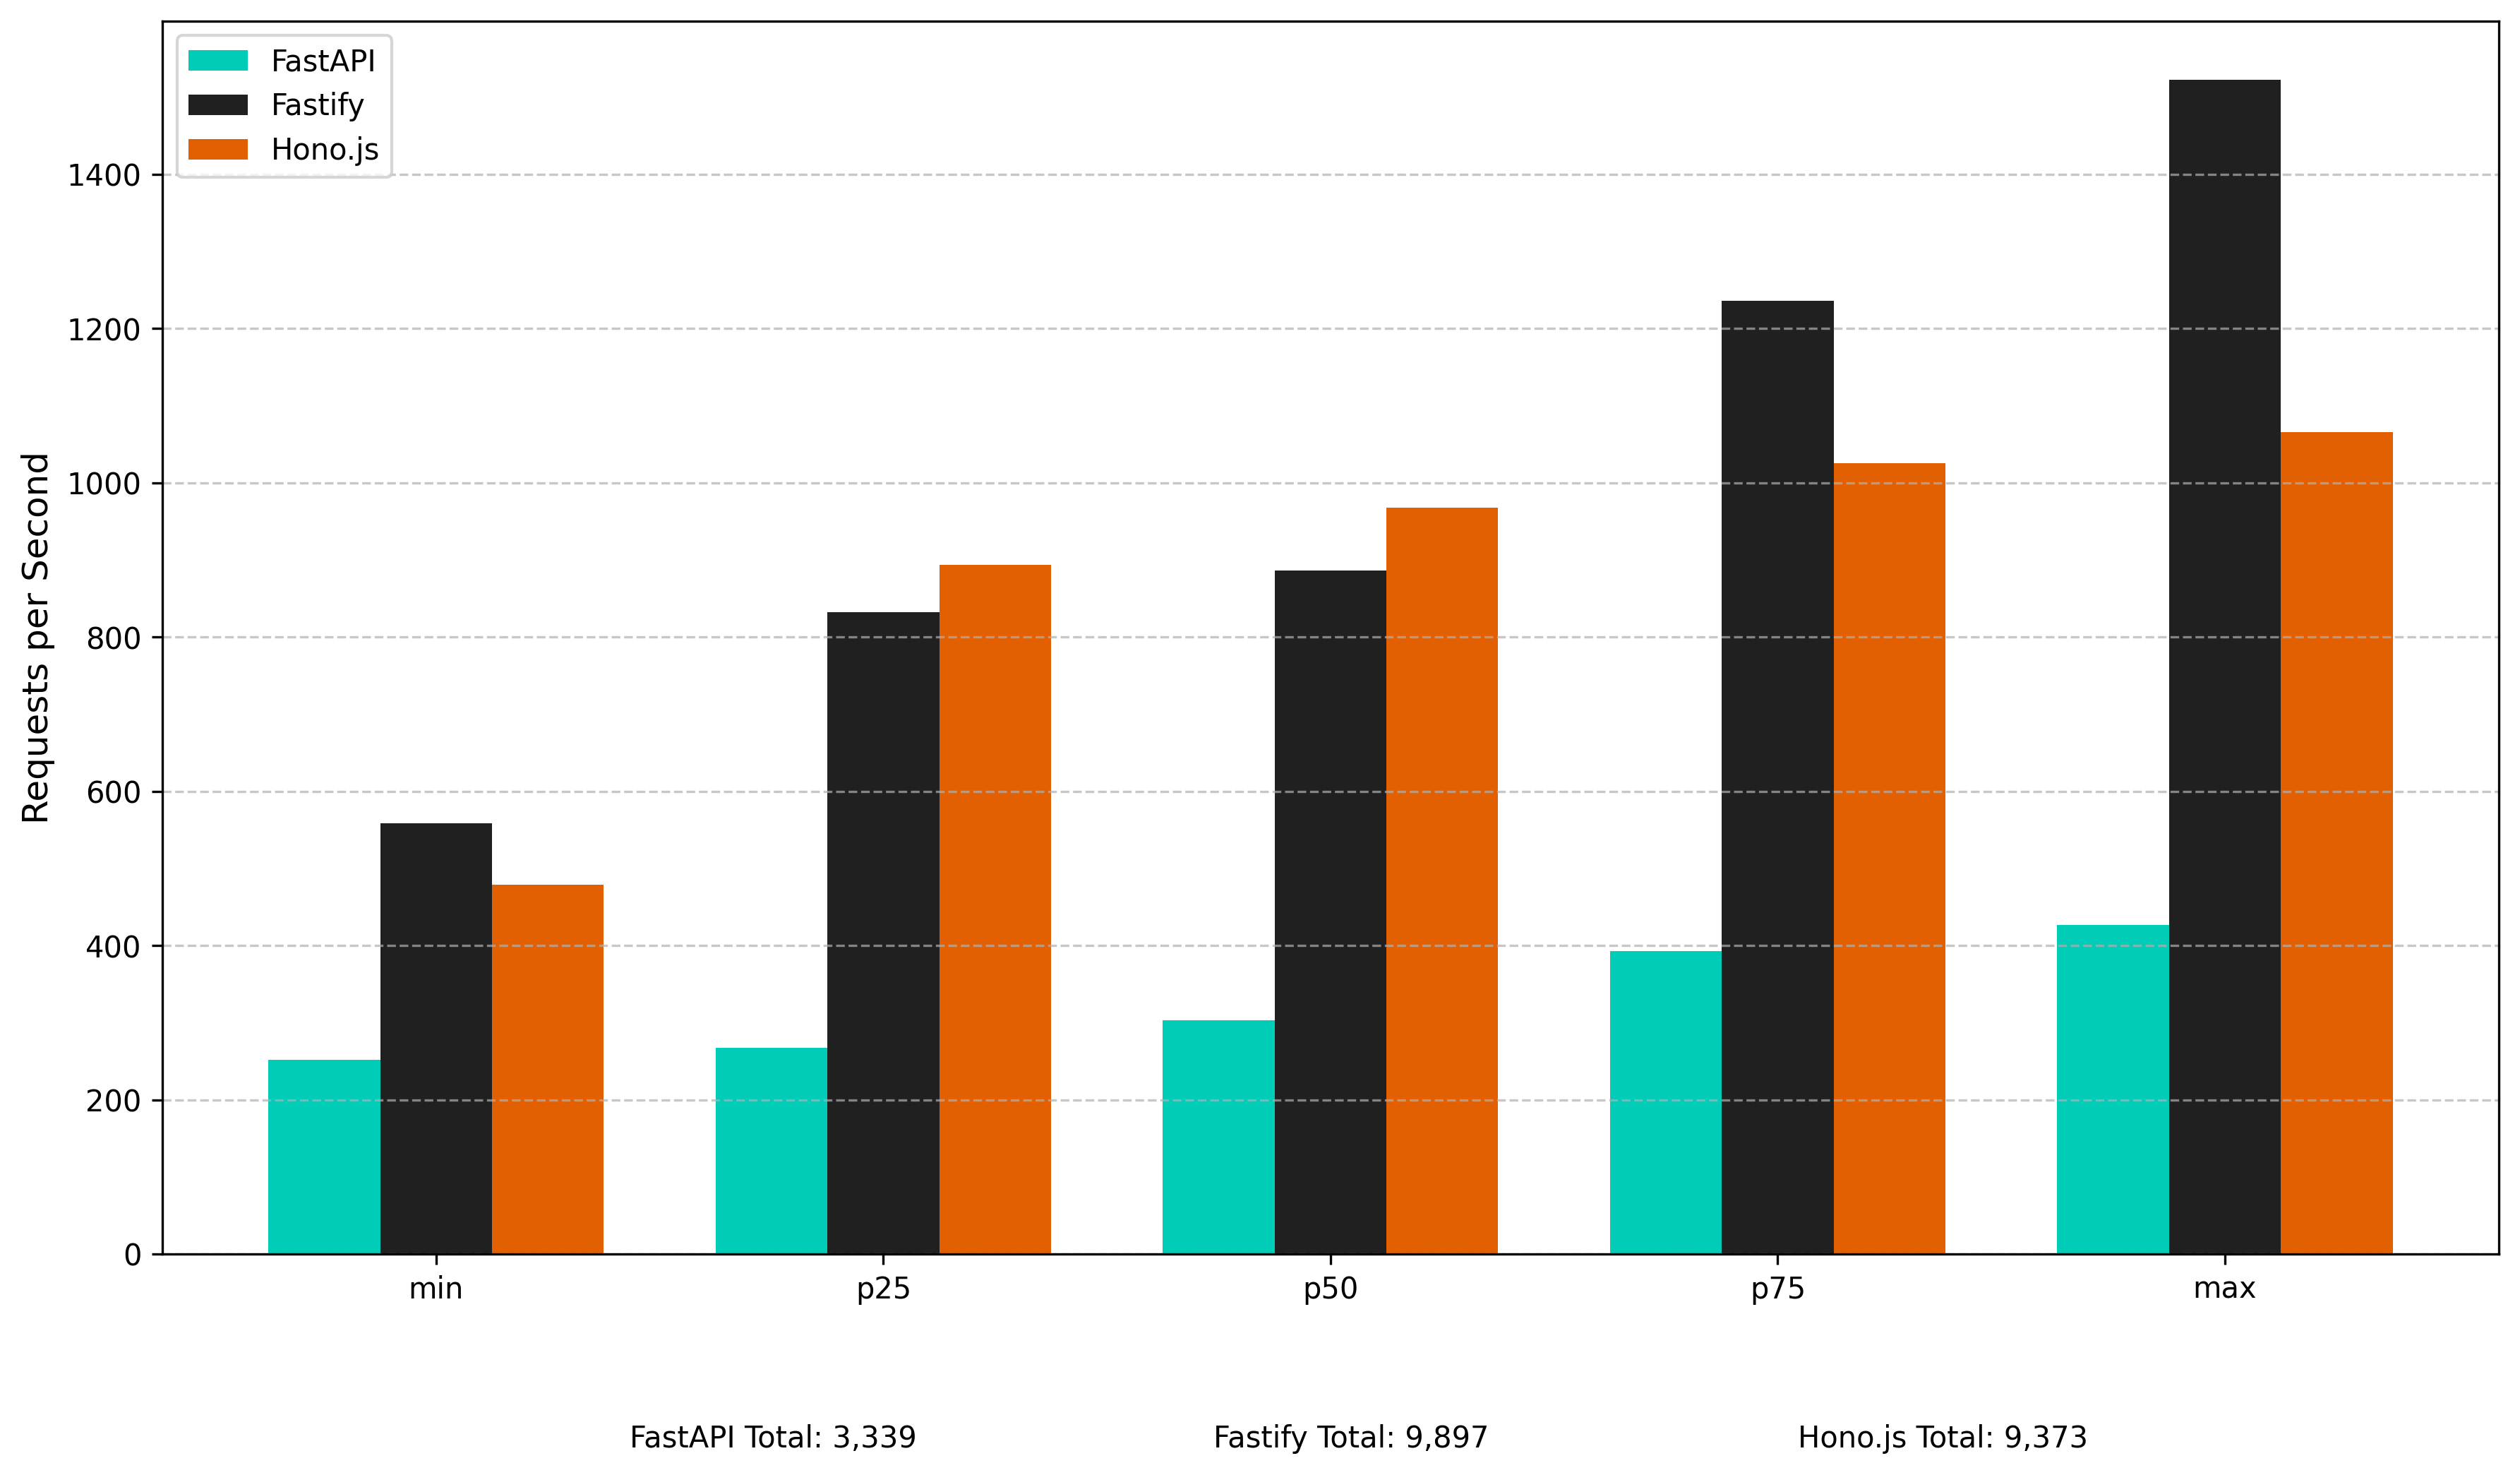

In [3]:
visualize_benchmark_results("/items")

The `/items` endpoint involves fetching and processing data from a MongoDB database, Fastify demonstrated the highest performance with an average of 989.7 requests per second, making it about **2.9x faster** than FastAPI, which managed an average of 333.9 requests per second. Hono.js followed closely with an average of 937.3 requests per second, which is also roughly **2.8x** faster than FastAPI.

While both Fastify and Hono.js handled the database-heavy workload effectively, Fastify slightly edged out Hono.js in throughput. FastAPI, although consistent with a lower standard deviation, lagged significantly in comparison, indicating that for endpoints involving intensive database operations, both Fastify and Hono.js are far better suited for high-performance needs.